# Machine Learning - Final project
### Empathy Prediction using the [Young people survey](https://www.kaggle.com/miroslavsabo/young-people-survey/) dataset

#### Loading datasets

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":16,"axes.titlesize":16,"axes.labelsize":16})  
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=200

In [2]:
df = pd.read_csv('./input/responses.csv')
columns_desc = pd.read_csv('./input/columns.csv')

In [3]:
df.shape

(1010, 150)

#### Defining way to access description easily

In [6]:
all_columns =list(df)

desc = {}
for col_name in all_columns:
    desc[col_name] = columns_desc.loc[columns_desc['short'] == col_name].iloc[0][0]
    
def print_desc(column_name):
    print(column_name+" --> "+desc[column_name])

Example:

In [7]:
for col in all_columns[:5]:
    print_desc(col)

Music --> I enjoy listening to music.
Slow songs or fast songs --> I prefer.
Dance --> Dance, Disco, Funk
Folk --> Folk music
Country --> Country


# Data Exploration and preprocessing

We can start by looking at some statistics of the features, from where we can notice given the average Empathy of 3.858706 and its standard deviation, which is not that high, that most of the people are actually very Empathetic.

In [8]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

Since we are dealing with people data, I think it would be interesting to see what kind of people we have and if they can somewhat be clustered in different groups. One of the features that could better describe different type of people could be the age

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


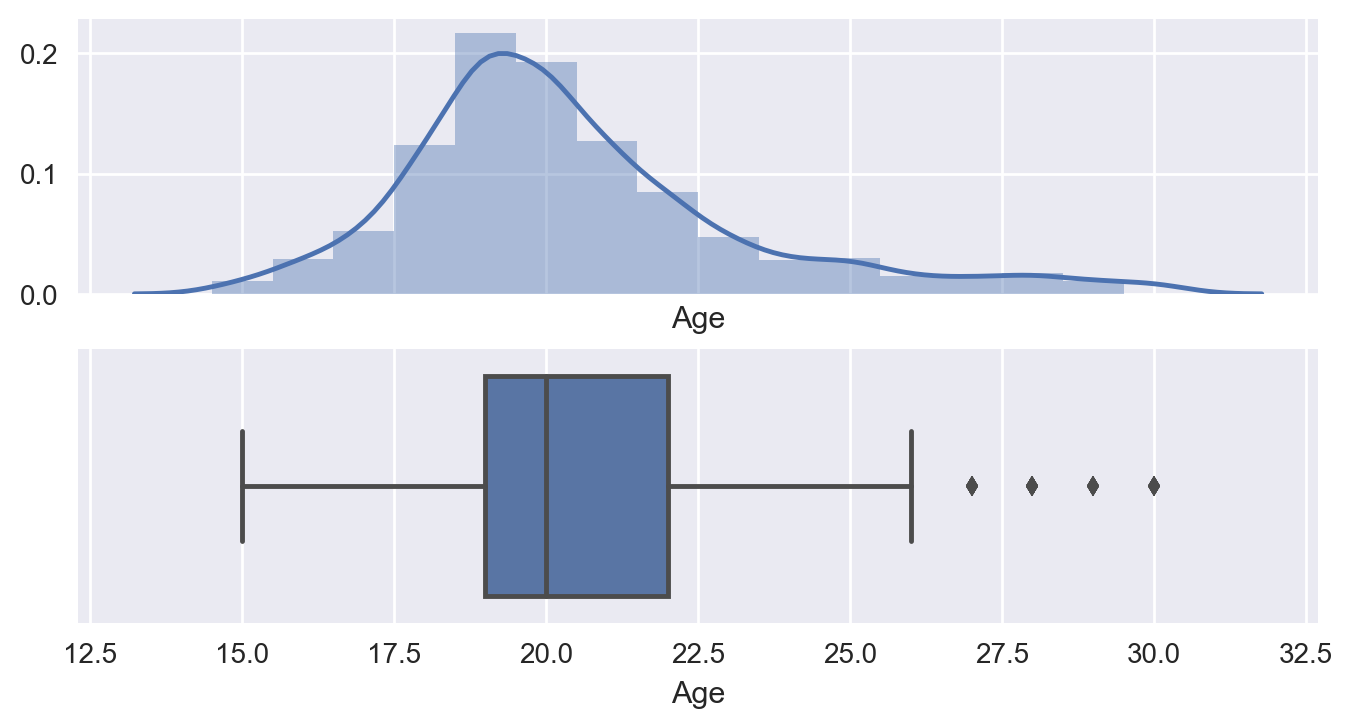

In [1732]:
sns.set(style="darkgrid", color_codes=True)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 4))
col = 'Age'

_ = sns.distplot(
    df[col].dropna(),
    bins=np.arange(df[col].min() - 0.5, df[col].max() + 0.5, 1),
    ax=ax[0])
_ = sns.boxplot(df[col].dropna())

The average is around 20 and the standard deviation seems pretty low, the age has a normal distribution, this makes me think that the age will not have much importance as a feature. There are a few outliers that I would have eliminated if we had had a very big dataset, it is not worth it to eliminate them in this case

In [9]:
df.rename(columns={'Left - right handed': 'LeftRightHanded', 'Village - town': 'VillageTown', 'Internet usage': 'InternetUsage', 'Only child': 'OnlyChild', 'House - block of flats': 'HouseFlats'}, inplace=True)

In [10]:
all_columns =list(df)

## Missing values handling

Let's start by looking at how many rows are missing a class label, I will delete these rows since it makes no sense to impute them, train or test using them

In [11]:
df['Empathy'].isna().sum()

5

In [12]:
df.dropna(subset=['Empathy'], inplace=True)

In [13]:
df.shape

(1005, 150)

Let's now look at the percentage of missing values in all columns in desc order

In [14]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data.head(150).T

,Height,Weight,Passive sport,Chemistry,Geography,Theatre,Documentary,Smoking,Latino,Punk,Criminal damage,Compassion to animals,Final judgement,"Reggae, Ska",Gardening,Alternative,Rock n roll,"Techno, Trance",Age,Classical music,"Swing, Jazz",Movies,Biology,Reading,Giving,PC,Gender,Number of siblings,Responding to a serious letter,Daily events,Science and technology,Art exhibitions,Friends versus money,Writing,"Countryside, outdoors",Rock,Folk,Self-criticism,Spiders,Country,Economy Management,Energy levels,Workaholism,Psychology,Foreign languages,Prioritising workload,Getting up,Medicine,Alcohol,Socializing,VillageTown,Pets,Active sport,Reliability,Loss of interest,Fun with friends,Cars,HouseFlats,Funniness,Decision making,Dance,"Hiphop, Rap",Questionnaires or polls,Finding lost valuables,Personality,Small - big dogs,Happiness in life,Getting angry,Children,Mood swings,Western,Internet,Cheating in school,Hypochondria,Judgment calls,Romantic,Comedy,Fantasy/Fairy tales,Animated,Religion,Physics,Dancing,Metal or Hardrock,Pop,Mathematics,Music,Appearence and gestures,Spending on looks,Life struggles,Interests or hobbies,Charity,Finances,Elections,Thinking ahead,Writing notes,Healthy eating,Entertainment spending,Rats,Heights,LeftRightHanded,Waiting,Flying,Adrenaline sports,Unpopularity,Public speaking,Horror,Assertiveness,Knowing the right people,Achievements,Celebrities,Parents' advice,Shopping centres,Sci-fi,Spending on healthy eating,OnlyChild,Slow songs or fast songs,Branded clothing,Lying,War,Shopping,Punctuality,Action,History,God,Changing the past,Darkness,New environment,Borrowed stuff,Dangerous dogs,Storm,Musical instruments,Education,Ageing,Musical,Loneliness,Law,Keeping promises,Fake,Health,Politics,Opera,Thriller,Fear of public speaking
Missing Ratio,1.99005,1.99005,1.492537,0.995025,0.895522,0.79602,0.79602,0.79602,0.79602,0.79602,0.696517,0.696517,0.696517,0.696517,0.696517,0.696517,0.696517,0.696517,0.696517,0.696517,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.497512,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.39801,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.298507,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.199005,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502,0.099502


The percentage of missing values is not a lot, we can easily impute them without introducing too much bias by using the mode

In [15]:
df[all_columns]=df[all_columns].fillna(df.mode().iloc[0])

In [16]:
df.isnull().any().any()

False

There are no missing values now

### Data types

In [17]:
df.dtypes[:10]

Music                       float64
Slow songs or fast songs    float64
Dance                       float64
Folk                        float64
Country                     float64
Classical music             float64
Musical                     float64
Pop                         float64
Rock                        float64
Metal or Hardrock           float64
dtype: object

In [18]:
float_cols = df.dtypes == np.float64

In [19]:
fake_float = list(df.loc[:, float_cols])

In [20]:
len(fake_float)

134

134 columns are float but should be int since the decimal value is always 0, let's convert them

In [21]:
df[fake_float] = df[fake_float].astype(int)

## One hot encoding for categorical features
Since the algorithms that I have in mind do not handle categorical values I will need to perform one hot encoding or encode values in numbers for ordinal data

Let's look at categorical columns and decide which ones can be ordinal

In [22]:
categorical = df.dtypes == np.object

In [23]:
df.loc[:, categorical].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009
Smoking,never smoked,never smoked,tried smoking,former smoker,tried smoking,never smoked,tried smoking,current smoker,tried smoking,never smoked,current smoker,tried smoking,tried smoking,never smoked,current smoker,former smoker,current smoker,tried smoking,tried smoking,former smoker,never smoked,tried smoking,tried smoking,tried smoking,tried smoking,tried smoking,tried smoking,never smoked,former smoker,tried smoking,former smoker,tried smoking,current smoker,tried smoking,tried smoking,tried smoking,never smoked,former smoker,tried smoking,never smoked,never smoked,tried smoking,never smoked,tried smoking,current smoker,never smoked,current smoker,tried smoking,current smoker,tried smoking,tried smoking,never smoked,current smoker,tried smoking,current smoker,current smoker,current smoker,current smoker,never smoked,current smoker,tried smoking,current smoker,never smoked,tried smoking,former smoker,tried smoking,tried smoking,never smoked,tried smoking,tried smoking,former smoker,tried smoking,former smoker,former smoker,tried smoking,...,tried smoking,tried smoking,never smoked,former smoker,never smoked,tried smoking,current smoker,tried smoking,current smoker,never smoked,current smoker,tried smoking,tried smoking,tried smoking,tried smoking,never smoked,former smoker,never smoked,tried smoking,former smoker,current smoker,current smoker,never smoked,tried smoking,current smoker,never smoked,tried smoking,never smoked,current smoker,tried smoking,tried smoking,tried smoking,never smoked,tried smoking,former smoker,current smoker,tried smoking,tried smoking,current smoker,current smoker,current smoker,tried smoking,current smoker,tried smoking,never smoked,tried smoking,tried smoking,tried smoking,tried smoking,current smoker,former smoker,tried smoking,current smoker,tried smoking,former smoker,former smoker,tried smoking,never smoked,former smoker,current smoker,tried smoking,former smoker,tried smoking,tried smoking,never smoked,never smoked,former smoker,current smoker,former smoker,former smoker,current smoker,never smoked,tried smoking,tried smoking,tried smoking
Alcohol,drink a lot,drink a lot,drink a lot,drink a lot,social drinker,never,social drinker,drink a lot,social drinker,drink a lot,social drinker,never,social drinker,social drinker,social drinker,social drinker,drink a lot,social drinker,social drinker,drink a lot,never,social drinker,social drinker,social drinker,never,social drinker,social drinker,social drinker,social drinker,social drinker,drink a lot,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,never,social drinker,social drinker,never,drink a lot,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,never,social drinker,social drinker,social drinker,drink a lot,drink a lot,drink a lot,social drinker,drink a lot,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,social drinker,never,drink a lot,social drinker,social drinker,never,social drinker,social drinker,social drinker,...,social drinker,social drinker,social drinker,social drinker,never,never,social drinker,drink a lot,social drinker,social drinker,drink a lot,social drinker,social drinker,social drinker,social drinker,never,drink a lot,never,social drinker,social drinker,drink a lot,drink a lot,social drinker,social drinker,social drinker,social drinker,social

In [24]:
categorical_cols = list(df.loc[:, categorical])

In [25]:
categorical_cols

['Smoking',
 'Alcohol',
 'Punctuality',
 'Lying',
 'InternetUsage',
 'Gender',
 'LeftRightHanded',
 'Education',
 'OnlyChild',
 'VillageTown',
 'HouseFlats']

There are a lot of ordinal columns, which is better because we will not occur in a feature explosion using OHE, I think the ordinal values could be:

* Punctuality
* InternetUsage
* Education

Some other that only have True/False or Yes/No or in general 2 possible values can be encoded using the same attribute and an integer value (0 or 1), these features are:

* Gender
* LeftRightHanded
* OnlyChild
* VillageTown
* HouseFlats

The remaining categorical attributes are the ones that I think are the most important to predict empathy or that are not really ordinal and I would not want to introduce a bias by considering them as ordinal, these attributes are:

* Smoking
* Lying
* Alcohol

In [26]:
print("Unique values of Smoking")
print(df.Smoking.unique())

print("\nUnique values of Lying")
print(df.Lying.unique())


Unique values of Smoking
['never smoked' 'tried smoking' 'former smoker' 'current smoker']

Unique values of Lying
['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me']


In [27]:
df.shape

(1005, 150)

In [28]:
def OHE_Smoking_N(value):
    return 1 if value=='never smoked' else 0

def OHE_Smoking_T(value):
    return 1 if value=='tried smoking' else 0

def OHE_Smoking_F(value):
    return 1 if value=='former smoker' else 0

def OHE_Smoking_C(value):
    return 1 if value=='current smoker' else 0

In [29]:
df['Smoking_Never'] = df.Smoking.apply(OHE_Smoking_N)
df['Smoking_Tried'] = df.Smoking.apply(OHE_Smoking_T)
df['Smoking_Former'] = df.Smoking.apply(OHE_Smoking_F)
df['Smoking_Current'] = df.Smoking.apply(OHE_Smoking_C)

In [30]:
def OHE_Lying_N(value):
    return 1 if value=='never' else 0

def OHE_Lying_S(value):
    return 1 if value=='sometimes' else 0

def OHE_Lying_O(value):
    return 1 if value=='only to avoid hurting someone' else 0

def OHE_Lying_E(value):
    return 1 if value=='everytime it suits me' else 0

In [31]:
df['Lying_Never'] = df.Lying.apply(OHE_Lying_N)
df['Lying_Sometimes'] = df.Lying.apply(OHE_Lying_S)
df['Lying_Only'] = df.Lying.apply(OHE_Lying_O)
df['Lying_Everytime'] = df.Lying.apply(OHE_Lying_E)

In [32]:
def OHE_Alcohol_D(value):
    return 1 if value=='drink a lot' else 0

def OHE_Alcohol_S(value):
    return 1 if value=='social drinker' else 0

def OHE_Alcohol_N(value):
    return 1 if value=='never' else 0

In [33]:
df['Alcohol_Drink'] = df.Alcohol.apply(OHE_Alcohol_D)
df['Alcohol_Social'] = df.Alcohol.apply(OHE_Alcohol_S)
df['Alcohol_Never'] = df.Alcohol.apply(OHE_Alcohol_N)

#### True False OHE

In [34]:
def OHE_Male(value):
    return 1 if value=='male' else 0

In [35]:
df['Male'] = df.Gender.apply(OHE_Male)

In [43]:
def OHE_Right(value):
    return 1 if value=='right handed' else 0

df['Right_Handed'] = df.LeftRightHanded.apply(OHE_Right)

def OHE_Only(value):
    return 1 if value=='yes' else 0

df['Only_Child'] = df.OnlyChild.apply(OHE_Only)

def OHE_City(value):
    return 1 if value=='city' else 0

df['City'] = df.VillageTown.apply(OHE_City)

def OHE_House(value):
    return 1 if value=='house/bungalow' else 0

df['House'] = df.HouseFlats.apply(OHE_House)

#### Ordinal

In [44]:
print("Unique values of Punctuality")
print(df.Punctuality.unique())

Unique values of Punctuality
['i am always on time' 'i am often early' 'i am often running late']


In [45]:
def OHE_Punctuality_Ordinal(value):
    if value=='i am always on time':
        return 1
    if value=='i am often early':
        return 2 
    if value=='i am often running late':
        return 0
    #should not arrive here
    return 0

In [46]:
df['Punctual'] = df.Punctuality.apply(OHE_Punctuality_Ordinal)

In [47]:
print("Unique values of InternetUsage")
print(df.InternetUsage.unique())

Unique values of InternetUsage
['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']


In [48]:
def OHE_InternetUsage_Ordinal(value):
    if value=='most of the day':
        return 3
    if value=='few hours a day':
        return 2 
    if value=='less than an hour a day':
        return 1
    if value=='no time at all':
        return 0
    #should not arrive here
    return 0

In [49]:
df['InternetUsage'] = df.InternetUsage.apply(OHE_InternetUsage_Ordinal)

In [50]:
print("Unique values of Education")
print(df.Education.unique())

Unique values of Education
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil']


In [51]:
def OHE_Education_Ordinal(value):
    if value=='doctorate degree':
        return 5
    if value=='masters degree':
        return 4 
    if value=='college/bachelor degree':
        return 3
    if value=='secondary school':
        return 2
    if value=='primary school':
        return 1
    if value=='currently a primary school pupil':
        return 0
    #should not arrive here
    return 0

In [52]:
df['Education'] = df.Education.apply(OHE_Education_Ordinal)

#### Deleting categorical columns that were encoded

In [54]:
encoded_columns = ['Smoking','Lying','Alcohol','Gender','LeftRightHanded','OnlyChild','VillageTown','HouseFlats','Punctuality']

df = df.drop(encoded_columns, axis=1)

In [55]:
df.shape

(1005, 158)

In [56]:
pd.options.display.max_columns = 158
pd.options.display.max_rows = 158

### Exploring relevant features

In [58]:
all_columns =list(df)

In [59]:
%matplotlib inline

In [60]:
df.shape[1]

158

In [62]:
cov = {}
for col in all_columns:
    if col != 'Empathy':
        l = ['Empathy']
        l.append(col)
        cov[col] = df['Empathy'].corr(df[col])

In [63]:
import operator
sorted_cov = sorted(cov.items(), key=operator.itemgetter(1))

In [64]:
most_correlated = []
for item in sorted_cov[:5]:
    most_correlated.append(item[0])
for item in sorted_cov[-5:]:
    most_correlated.append(item[0])
most_correlated

['Male',
 'Weight',
 'Cars',
 'Fake',
 'Height',
 'Latino',
 'Fantasy/Fairy tales',
 'Children',
 'Judgment calls',
 'Life struggles']

### Matrix correlation for the 10 features which are correlated (positive or negative) the most to Empathy

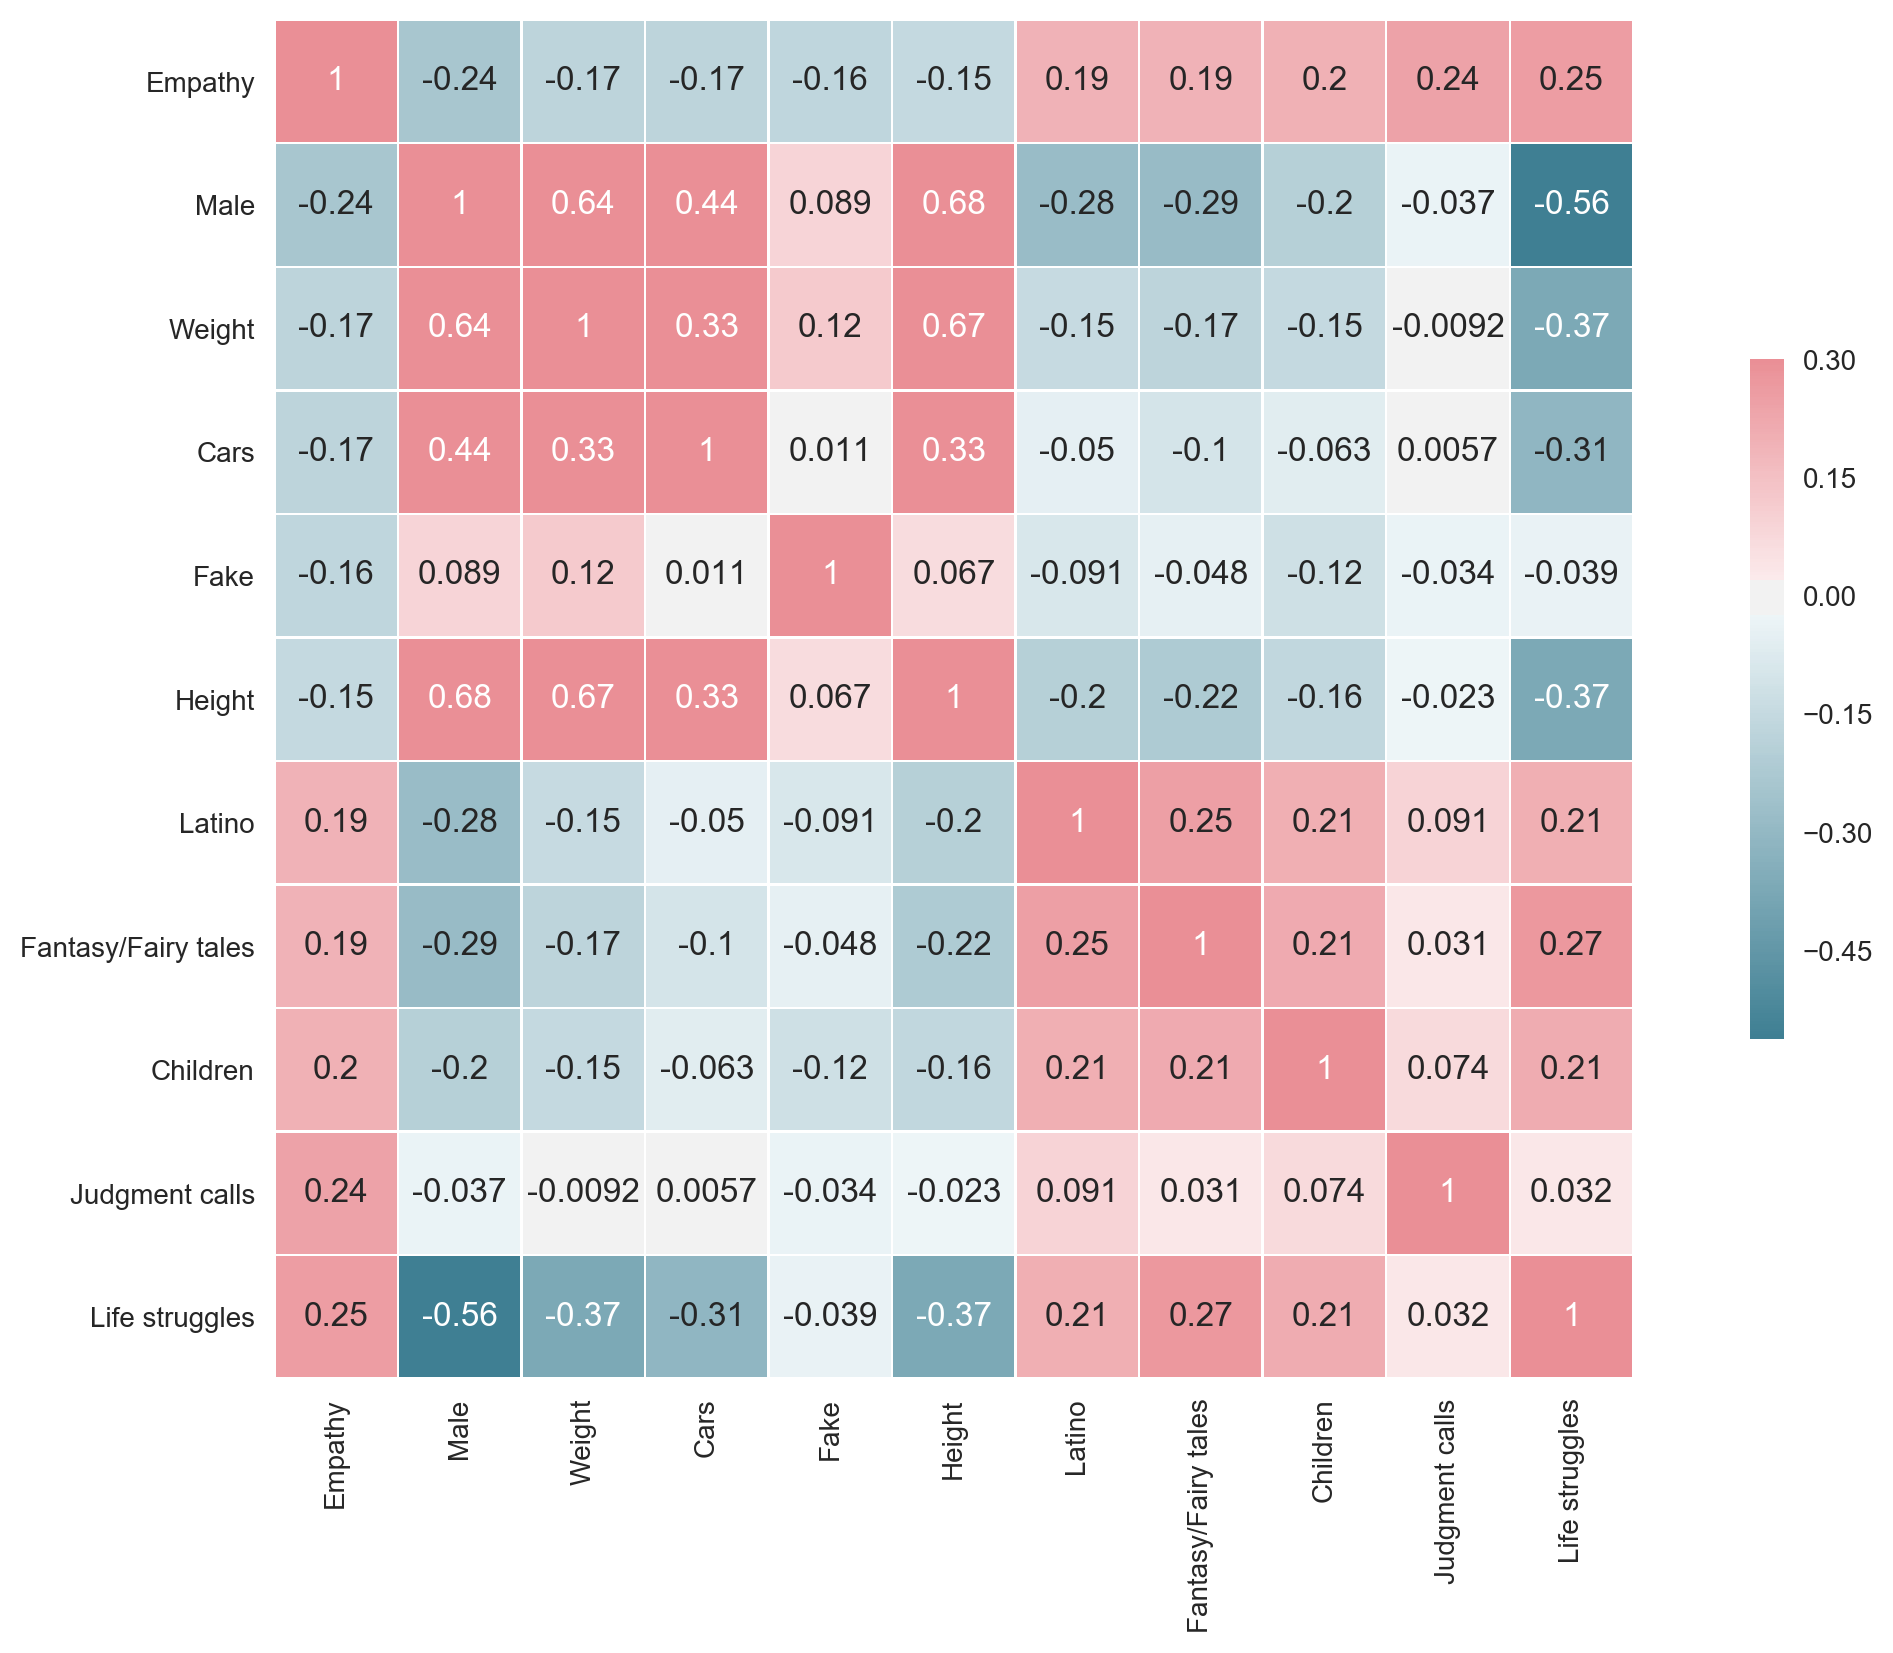

In [1735]:
f, ax = plt.subplots(figsize=(15, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    covariance,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    annot=True,
    linewidths=.5,
    cbar_kws={"shrink": .5})

We can notice that there also redundant features such as weight and height, because they are very correlated to the gender. Intuitively, this is true, an average man weights more and is taller than an average woman. Some algorithms such as random forest, can deal with this type of redundancies pretty well by selecting a random subsample of features for every tree. I would not worry now about dealing with all the correlated features.

At this point the preprocessing should be done, I will save the dataset so I don't have to run all the cells again next time.

In [1705]:
df.to_csv('./input/preprocessed_dataset', index=False)

#### PCA
I tried PCA (PCAtest notebook) for dimensionality reduction by I did not apply it at the end, so I didn't include the code in this notebook that is gonna become pretty heavy

# Models

## Reasoning about a model

The problem is a binary classification problem: Empathetic, Not empathetic. However, I can also try to exploit the fact that the dataset is given with the label "empathy" which can be a value between 0 and 5, 4 and 5 means empathetic, 1, 2 and 3 means not empathetic.

Exploiting this fact I could use regressor models and use powerful algorithms such as random forests. Since we have a lot of features, the random choosing of features for each tree could be beneficial. Also, there are a lot of correlated predictors which are well handled by bagging but not by boosting methods.

I will also try some good bagging algorithms like XGBoost, for this type of algorithms I would most likely have to apply PCA for highly correlated data to get orthogonal variables, or let an algorithm select a subset of relevant features and only use a subset of all features.

In [4]:
df = pd.read_csv('./input/preprocessed_dataset')

## Baseline and basic models
before trying to go straight towards more powerful algorithms, let's see how some simple algorithms work to have an idea of how difficult the problem is and what is the baseline accuracy

### Logistic Regression

### Predicting multiclass and converting in 0-1 after

In [71]:
from sklearn.linear_model import LogisticRegression

In [2293]:
pivot = int(0.8 * len(df))
predicting_features = list(df)
predicting_features.remove('Empathy')

x = np.array(df[predicting_features])
y = np.array(df['Empathy'])

x_test = x[pivot:]
x_train = x[:pivot]

y_test = y[pivot:]
y_train = y[:pivot]

print("Len validation:", len(x_test), "Len train:", len(x_train))

Len validation: 201 Len train: 804


In [2294]:
LR = LogisticRegression()

LR.fit(x_train, y_train)
# score = model.score(x_test, y_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2295]:
y_hat = LR.predict(x_test)

In [2296]:
from numpy import *

In [2304]:
y_hat_train = LR.predict(x_train)

def transform_in_binary(empathy_level):
    return 0 if empathy_level < 4 else 1

bin_trans = vectorize(transform_in_binary)

y_hat_binary = bin_trans(y_hat)
y_test_binary = bin_trans(y_test)

y_hat_train_binary = bin_trans(y_hat_train)
y_train_binary = bin_trans(y_train)

print('accuracy on Test')
mean(y_hat_binary == y_test_binary)

print('accuracy on Train')
mean(y_hat_train_binary == y_train_binary)

The model is somewhat overfitting and the accuracy is not that great

## Baseline model: Support Vector Machines

### OVO SVM

In [2305]:
from sklearn import svm

In [ ]:
svm_ovo = svm.SVC(C=1.0, decision_function_shape='ovo')
svm_ovo.fit(x_train, y_train) 


y_hat = svm_ovo.predict(x_test)

y_hat_binary = bin_trans(y_hat)
y_test_binary = bin_trans(y_test)

print('accuracy:')
mean(y_hat_binary == y_test_binary)

y_hat_train = svm_ovo.predict(x_train)

print('accuracy on training')
mean(y_hat_train == y_train)

In this case the model is overfitting a lot more, and the accuracy is pretty bad

### Linear SVM binary classification

In [2315]:
svm_linear = svm.SVC()
svm_linear.fit(x_train, y_train_binary) 

y_hat_binary = svm_linear.predict(x_test)

mean(y_hat_binary == y_test_binary)

This is a little better than OVO multiclass SVM

## Majority voting classifier

In [2327]:
mean(concatenate((y_train_binary,y_test_binary), axis=None))

0.6616915422885572

The expected accuracy of a majority voting classifier is around 66%, this means the other basic learners are doing pretty bad and the problem is somewhat complex.

Complex model -> complex algorithms needed, let's try to see how random forest perform

## Random Forest regressor
I will first try to use regression with random forest leaving the Empathy on a scale from 1 to 5 and then convert the results in 0-1. This is just a basic test and I'm not tuning hyperparameters nor splitting in train test yet

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2336]:
len(selected_features)

157

In [2338]:
selected_features = predicting_features

In [2339]:
x = np.array(df[selected_features])
y = np.array(df['Empathy'])

In [2340]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
print('df.shape    ', df.shape)
print('x_train.shape ', x_train.shape)
print('x_test.shape  ', x_test.shape)
print('y_train.shape  ', y_train.shape)
print('y_test.shape  ', y_test.shape)

df.shape     (1005, 158)
x_train.shape  (804, 157)
x_test.shape   (201, 157)
y_train.shape   (804,)
y_test.shape   (201,)


In [2419]:
RFR = RandomForestRegressor(n_estimators=300, n_jobs=-1, verbose=0)

In [2420]:
RFR.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Let's plot the features by their importance found by the algorithm

In [2421]:
idx = RFR.feature_importances_.argsort()[::-1]

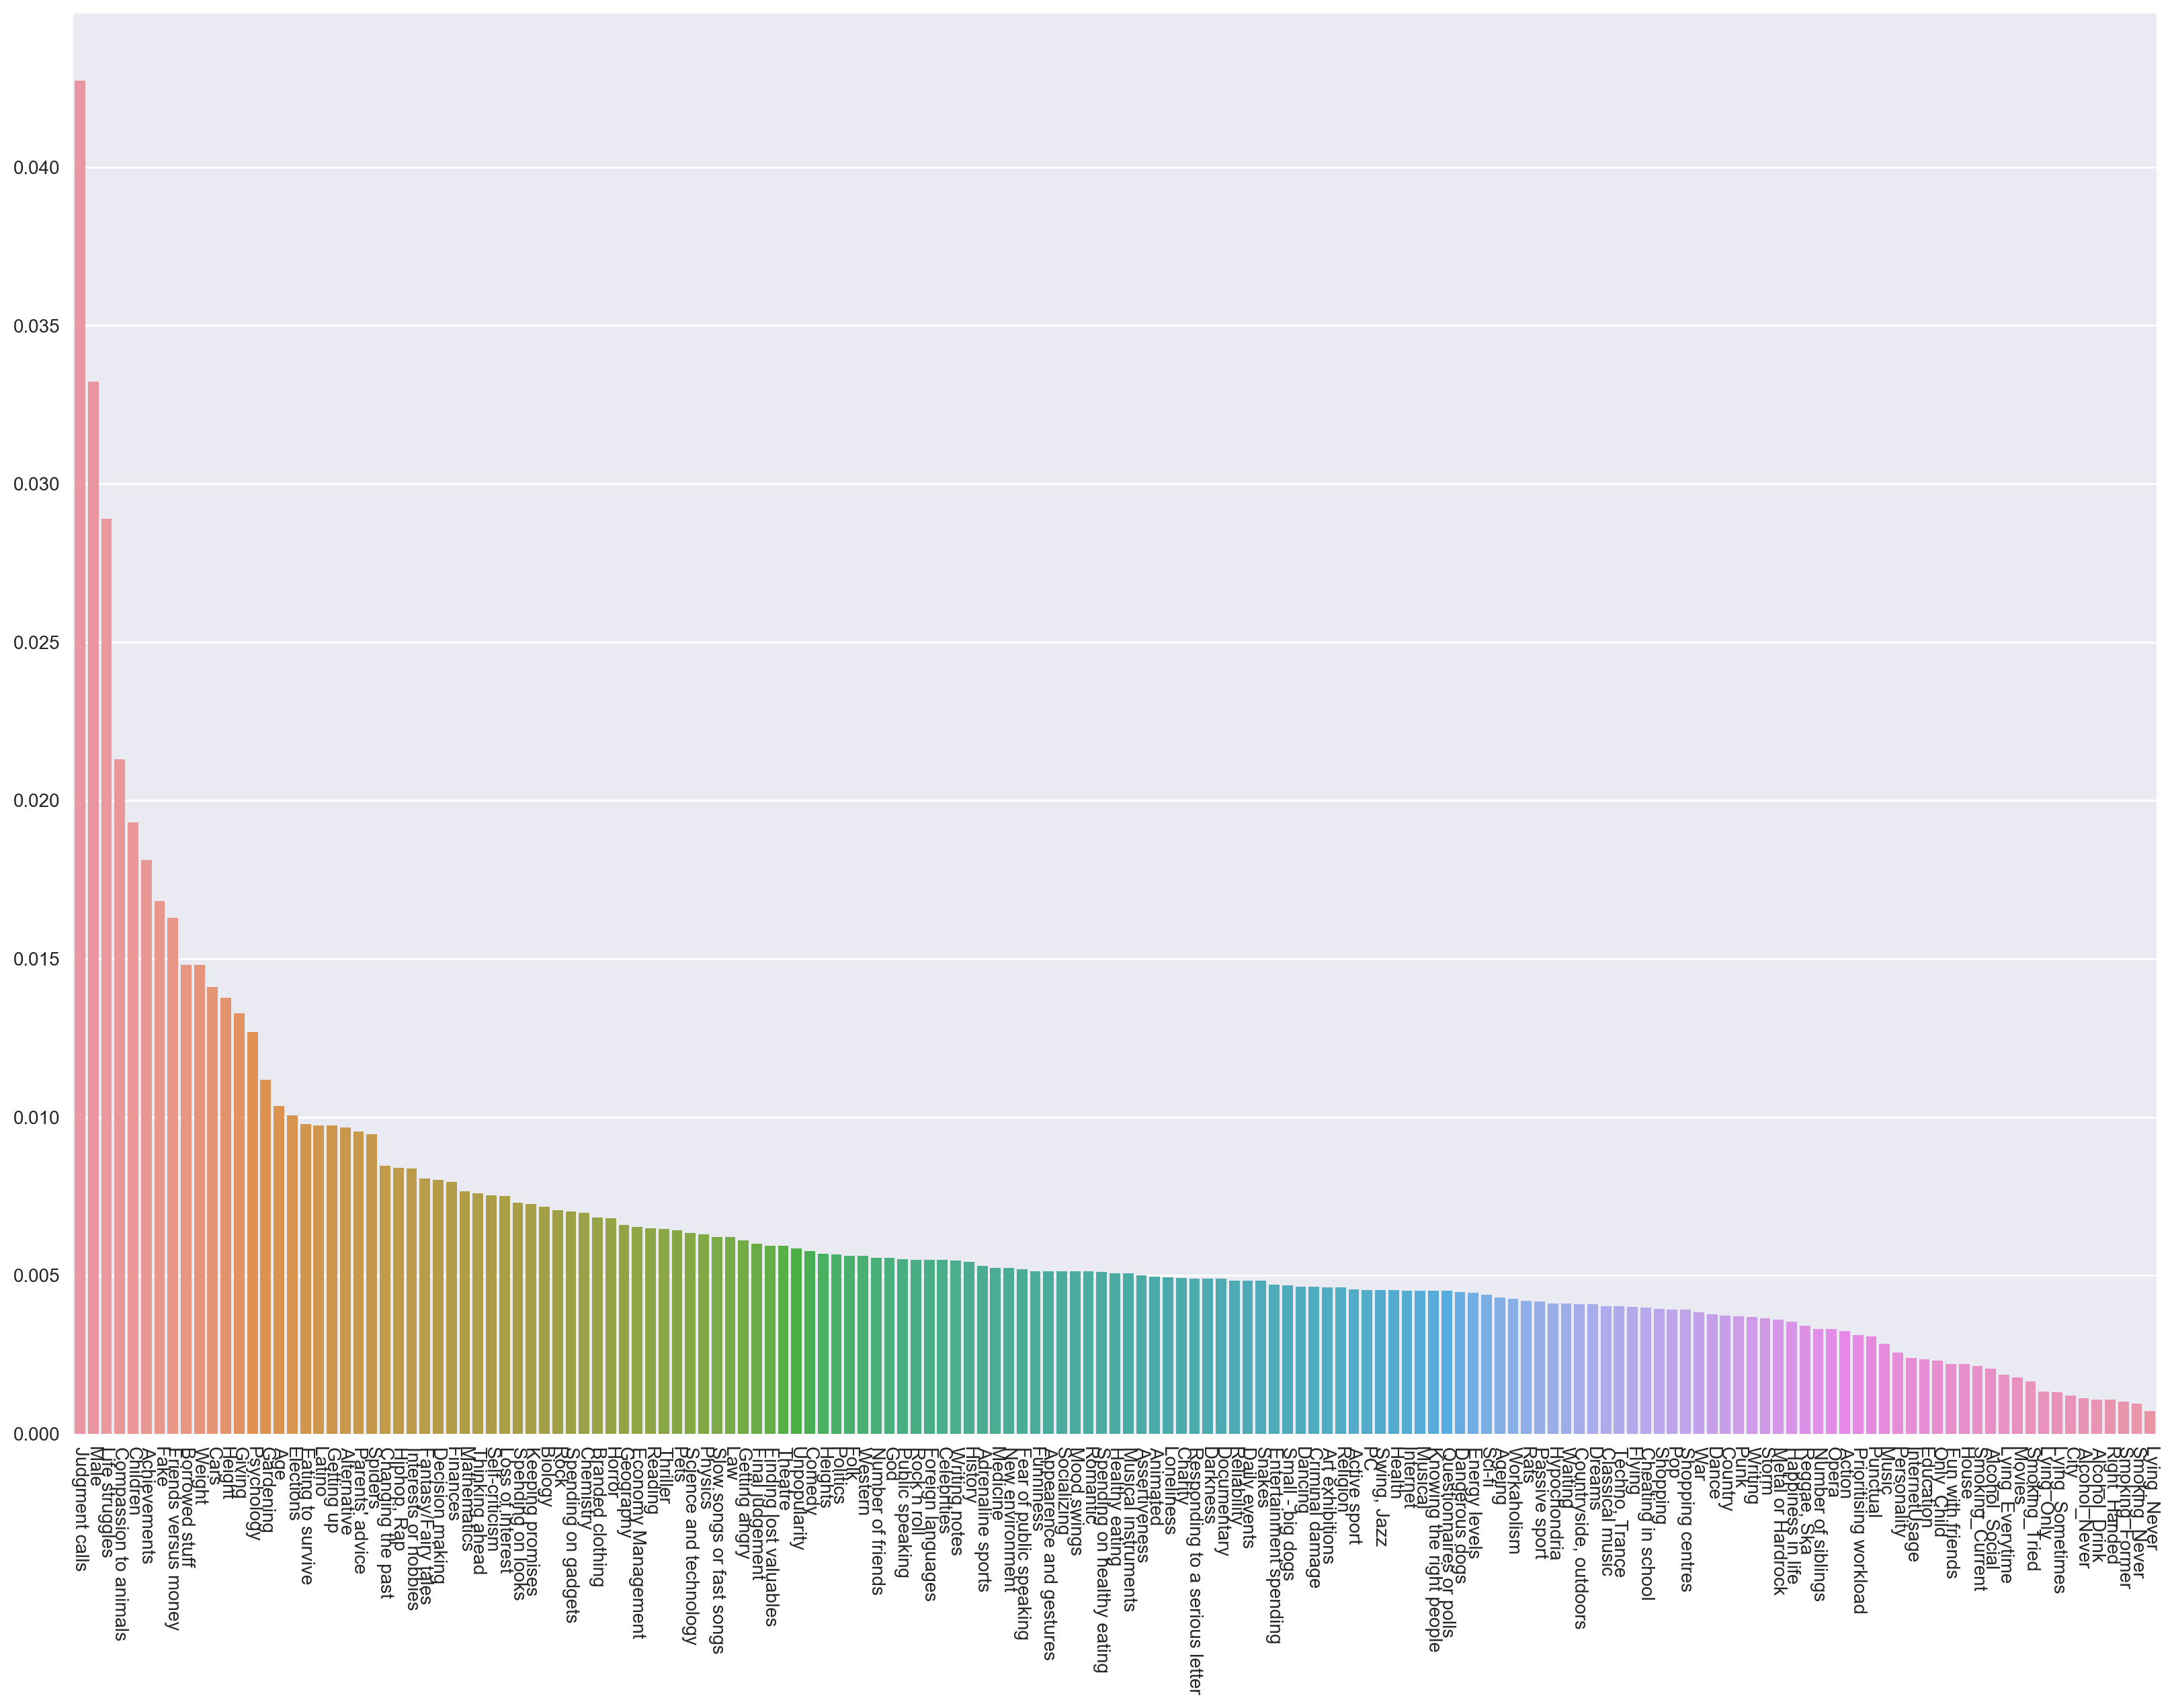

In [2422]:
ax = sns.barplot(x=df[selected_features].columns[idx], y=RFR.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

We could also do a feature selection here, based on the importances found by the random forest

In [2428]:
y_hat = RFR.predict(x_test)

In [2429]:
mean(y_hat)

3.804776119402985

In [2430]:
mean(y_test)

3.711442786069652

In [2431]:
def transform_contininous_in_binary(empathy_level):
    return 0 if empathy_level < 3.5 else 1
cont_bin_trans = vectorize(transform_contininous_in_binary)
y_hat_binary = cont_bin_trans(y_hat)
y_test_binary = cont_bin_trans(y_test)

In [2432]:
mean(y_hat_binary == y_test_binary)

0.7064676616915423

In [2436]:
y_hat_train = RFR.predict(x_train)
y_hat_train_binary = cont_bin_trans(y_hat_train)
y_train_binary = cont_bin_trans(y_train)

In [2437]:
mean(y_hat_train_binary == y_train_binary)

0.9950248756218906

Despite its ability to limit overfitting, even random forest without tuning the hyperparameters overfit, I think that this means that the dataset is too small, a significant overfitting will almost always occur. The model is doing better than the baselines by at least 4%, so this is a good direction

## Random forest binary classifier
I will now try to do a 20-fold crossvalidation with a random forest binary classifier (0-1)

In [193]:
def encode_emp(value):
    return 0 if value<4 else 1

df['Empathy'] = df.Empathy.apply(encode_emp)

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=20)
x = np.array(df[new_feat])
y = np.array(df['Empathy'])
kf.get_n_splits(x)

accuracy = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    RFR = RandomForestClassifier(n_estimators=50, n_jobs=-1, verbose=0)
    
    RFR.fit(x_train, y_train)
    y_hat = RFR.predict(x_test)
    accuracy.append(mean(y_hat == y_test))

print(mean(accuracy))

Since this is a crossvalidation, this is a more realistic result, it's not bad

# Error detection and correction
I will now try to understand where the predictor is doing bad, if there are some examples that are more prone to errors, for this task I will perform a leave-one-out crossvalidation, so for each example I will train on the whole dataset minus that example and test on that, this is only possible since the dataset is really small, otherwise it would be computationally hard 

## LOO CV Random Forest binary classifier

In [ ]:
df = pd.read_csv('./input/preprocessed_dataset')

In [1754]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(x)
# kf = KFold(n_splits=20)
x = np.array(df[selected_features])
y = np.array(df['Empathy'])
# kf.get_n_splits(x)

def transform_contininous_in_binary(empathy_level):
    return 0 if empathy_level < 3.5 else 1
cont_bin_trans = vectorize(transform_contininous_in_binary)

accuracy = []

for train_index, test_index in loo.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     print(y_train)
#     print(y_test)
    RFR = RandomForestRegressor(n_estimators=100, max_depth= 6, n_jobs=-1, verbose=0)
    
    RFR.fit(x_train, y_train)
    y_hat = RFR.predict(x_test)
    y_hat_binary = cont_bin_trans(y_hat)
#     print(y_hat)
#     print(y_hat_binary)
    y_test_binary = cont_bin_trans(y_test)
#     print(y_test)
#     print(y_test_binary)
#     print(mean(y_hat_binary == y_test_binary))
    accuracy.append(mean(y_hat_binary == y_test_binary))

print(mean(accuracy))
#0.7215098039215686

0.7194029850746269


### Wrong predicted examples
From the accuracy I can find out the missclassified examples, take all the missclassified examples and look at some statistics to find useful patterns

In [ ]:
accuracy

In [1771]:
one = array(accuracy)

In [1772]:
one

array([0., 0., 1., ..., 1., 1., 1.])

In [1774]:
wrong_predicted = df[one == 0]

This are the statistics for the entire dataset for comparison

In [1797]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,InternetUsage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Education,Smoking_Never,Smoking_Tried,Smoking_Former,Smoking_Current,Lying_Never,Lying_Sometimes,Lying_Only,Lying_Everytime,Alcohol_Drink,Alcohol_Social,Alcohol_Never,Male,Right_Handed,Only_Child,City,House,Punctual
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.00000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.00000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.00000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,4.736318,3.330348,3.112438,2.288557,2.123383,2.956219,2.763184,3.470647,3.773134,2.358209,2.446766,2.915423,2.7701

This are the statistics for the missclassified examples subset

In [1777]:
wrong_predicted.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,InternetUsage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Education,Smoking_Never,Smoking_Tried,Smoking_Former,Smoking_Current,Lying_Never,Lying_Sometimes,Lying_Only,Lying_Everytime,Alcohol_Drink,Alcohol_Social,Alcohol_Never,Male,Right_Handed,Only_Child,City,House,Punctual
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,282.000000
mean,4.702128,3.294326,3.035461,2.187943,2.088652,2.953901,2.609929,3.421986,3.815603,2.351064,2.496454,2.982270,2.709220,2.716312,3.095745,2.723404,2.673759,2.290780,2.049645,4.606383,2.882979,3.457447,4.404255,3.386525,3.120567,3.177305,3.578014,3.695035,3.638298,2.14539,3.5460

## Error Fixing
I especially looked at the mean. Most of the means between same features in the 2 different datasets are similar, at most 0.2 of difference. The only one which is really different is the class label Empathy. For this feature, in fact, the entire dataset has an average of 3.85, while the missclassified examples have an average Empathy of 2.98.

Moreover, the 75% percentile is 3 for the missclassified examples. This means that at least 75% of these examples will fall in the category on *Not very empathetic*, therefore, the problem in the prediction is mainly the inability of understanding when to predict 0.

I thought at how to improve this, and I think I will create a custom ensemble by using a different model and do the same prediction, if either one of them predicts 0, I will assign 0 to that (logic AND of the predictions)

## Train/dev/test split
With this small dataset, it's not convenient to take an holdout test set too big, I'll go with a 80/20 split

To tune hyperparameters I will use crossvalidation 

In [5]:
df = pd.read_csv('./input/preprocessed_dataset')
def encode_emp(value):
    return 0 if value<4 else 1
df['Empathy'] = df.Empathy.apply(encode_emp)

In [45]:
from sklearn.model_selection import train_test_split

selected_features = list(df)
selected_features.remove('Empathy')
# x = np.array(df[selected_features])
# y = np.array(df['Empathy'])
x = df[selected_features].copy()
y = df['Empathy'].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)
print('df.shape    ', df.shape)
print('x_train.shape ', x_train.shape)
print('x_test.shape  ', x_test.shape)
print('y_train.shape  ', y_train.shape)
print('y_test.shape  ', y_test.shape)

df.shape     (1005, 158)
x_train.shape  (804, 157)
x_test.shape   (201, 157)
y_train.shape   (804,)
y_test.shape   (201,)


## Parameters tuning Random Forest

In [46]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

In [48]:
params = range(1, 111, 5)  #50,201,50

scores, tst_scr = validation_curve(RandomForestClassifier(), x_train,\
                                       y_train, 'n_estimators', params, \
                                       cv=5,n_jobs=-1, verbose=1)

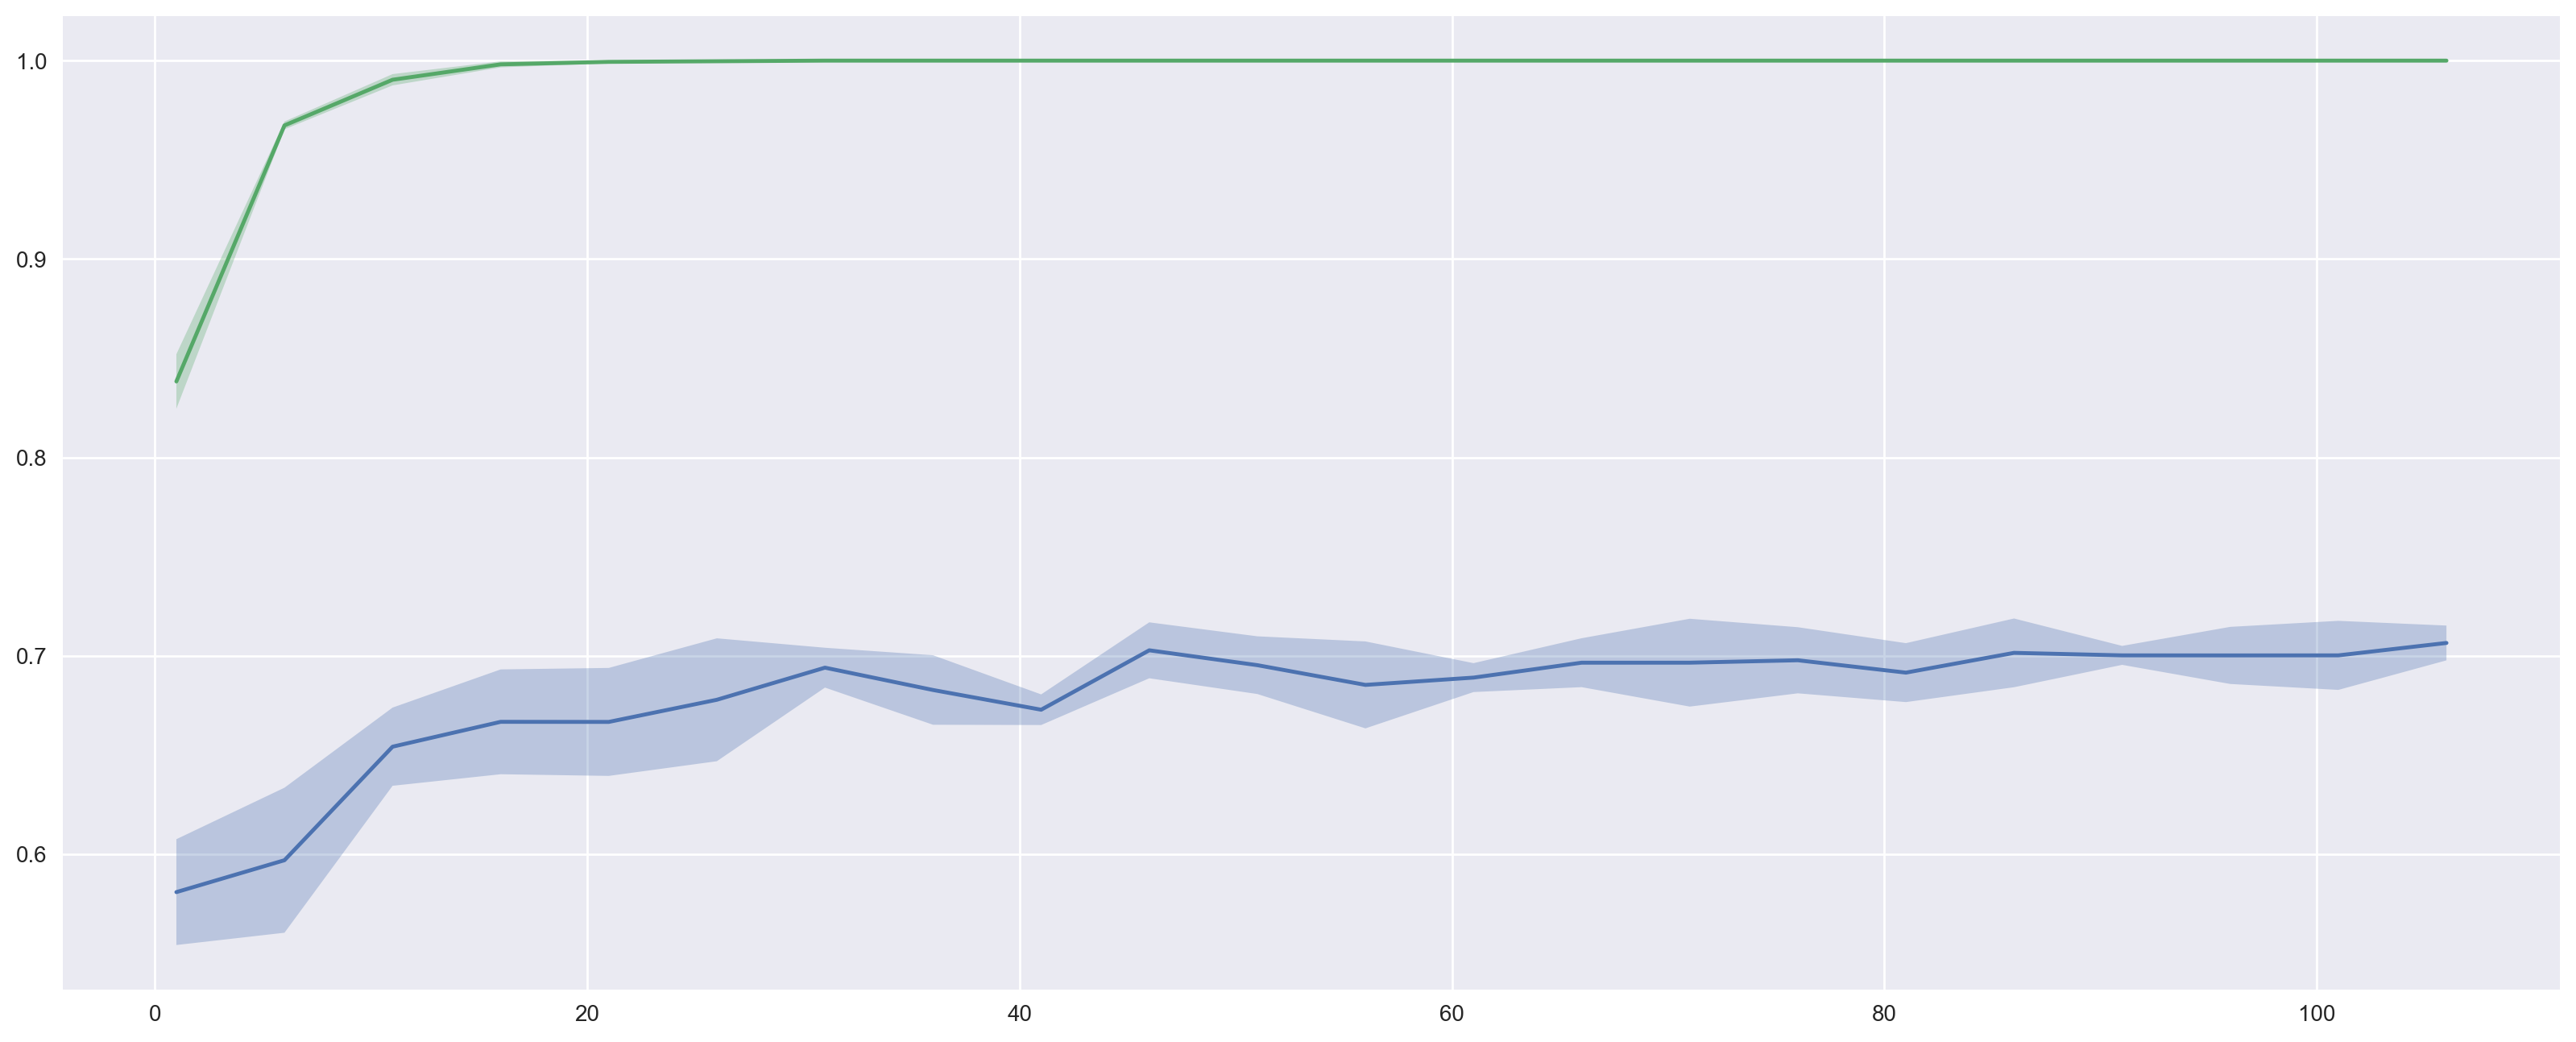

In [49]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [51]:
params = range(5, 20, 1)  #50,201,50

scores, tst_scr = validation_curve(RandomForestClassifier(n_estimators = 100), x_train,\
                                       y_train, 'max_depth', params, \
                                       cv=20,n_jobs=-1, verbose=1)

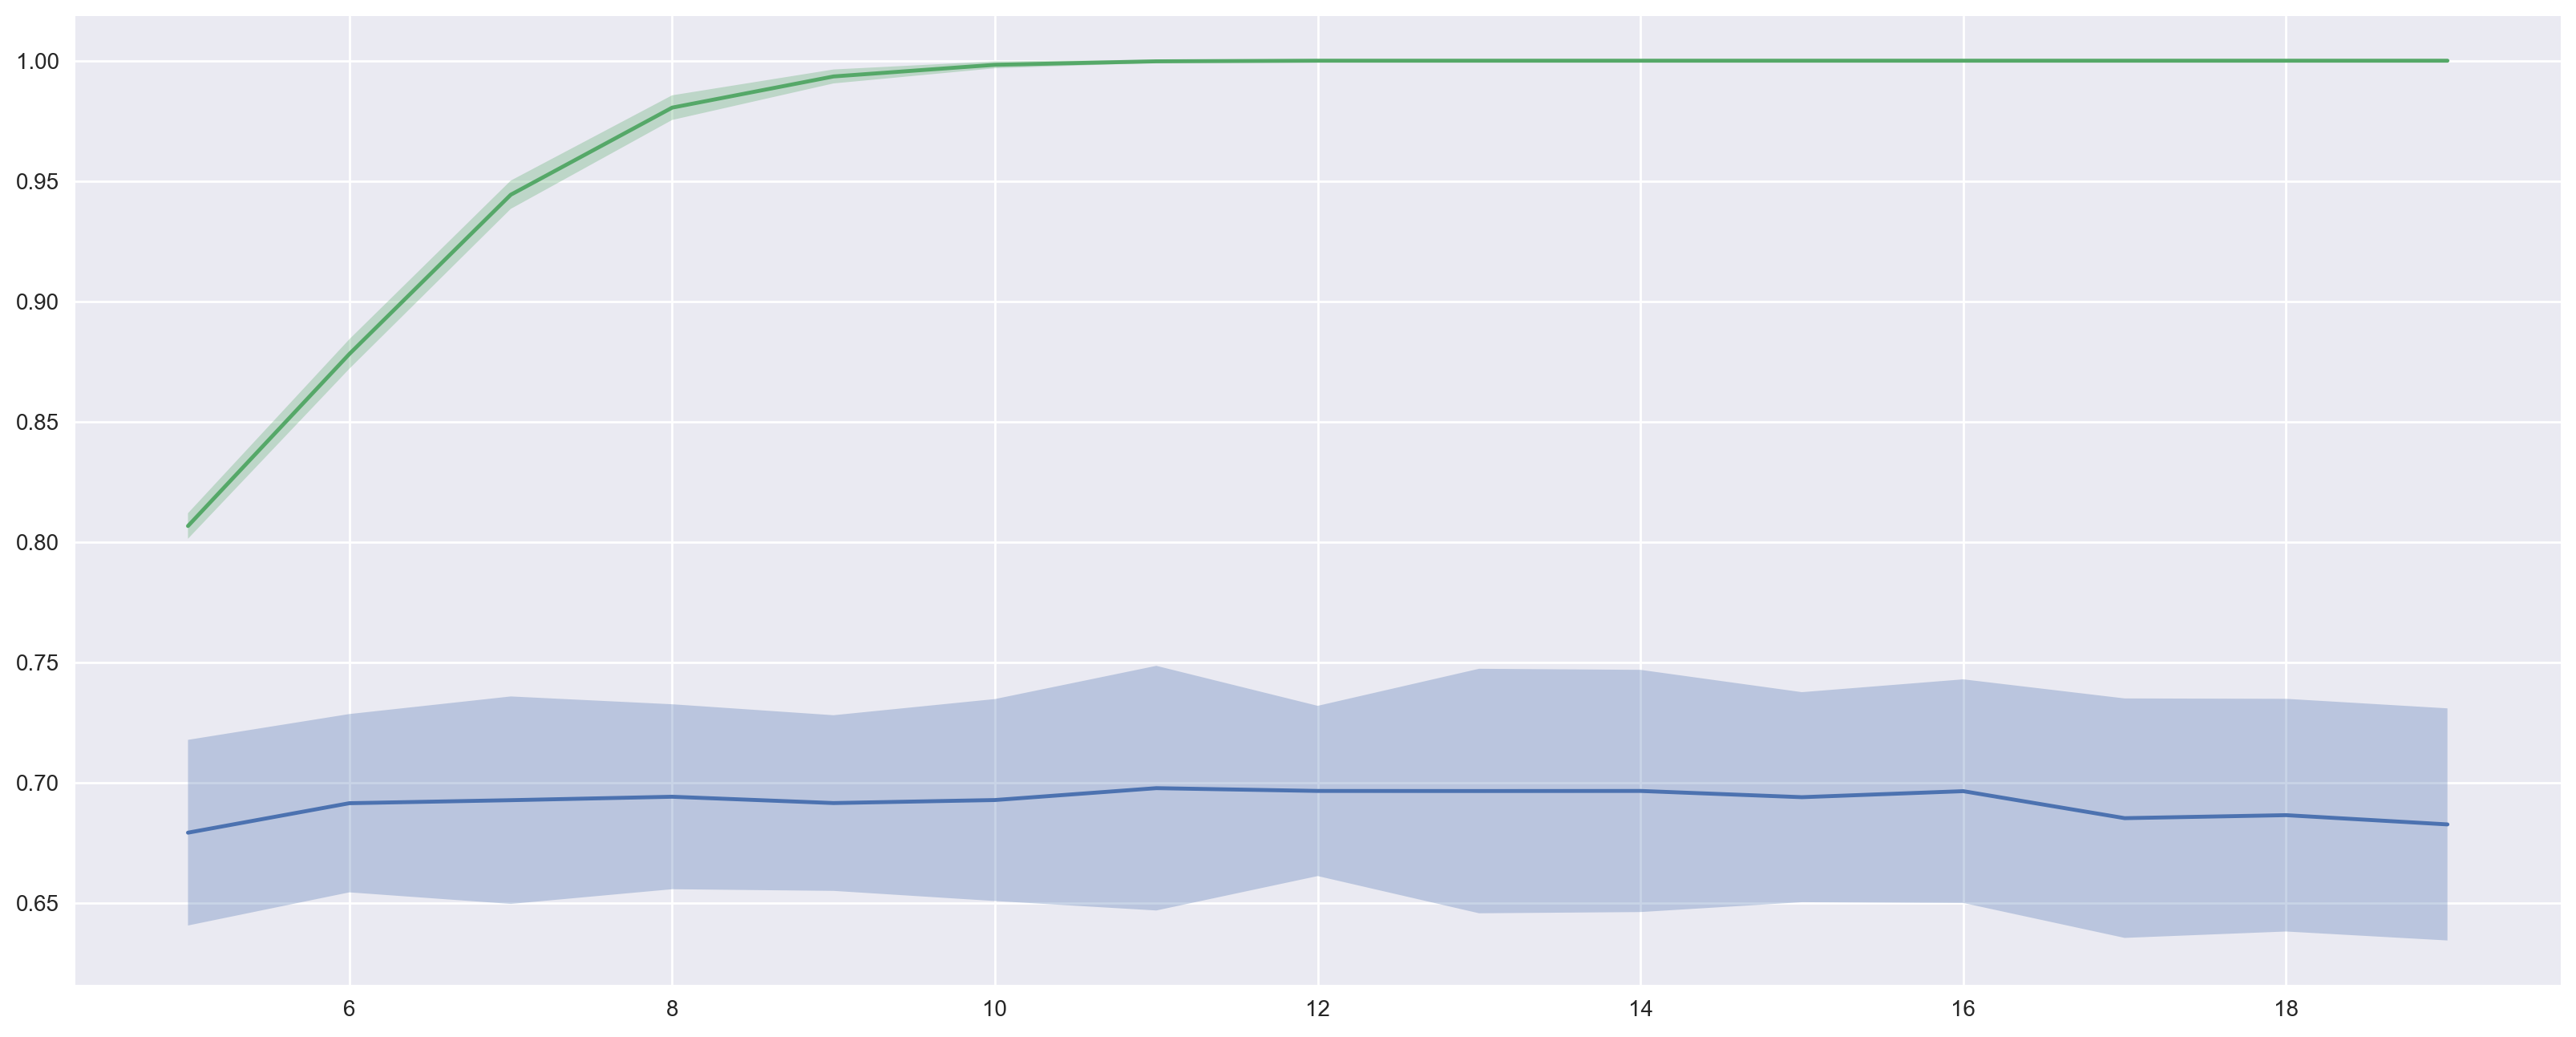

In [52]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [54]:
params = range(6, 14, 1)  #50,201,50

scores, tst_scr = validation_curve(RandomForestClassifier(n_estimators= 100, max_depth = 14), x_train,\
                                       y_train, 'max_features', params, \
                                       cv=10,n_jobs=-1, verbose=1)

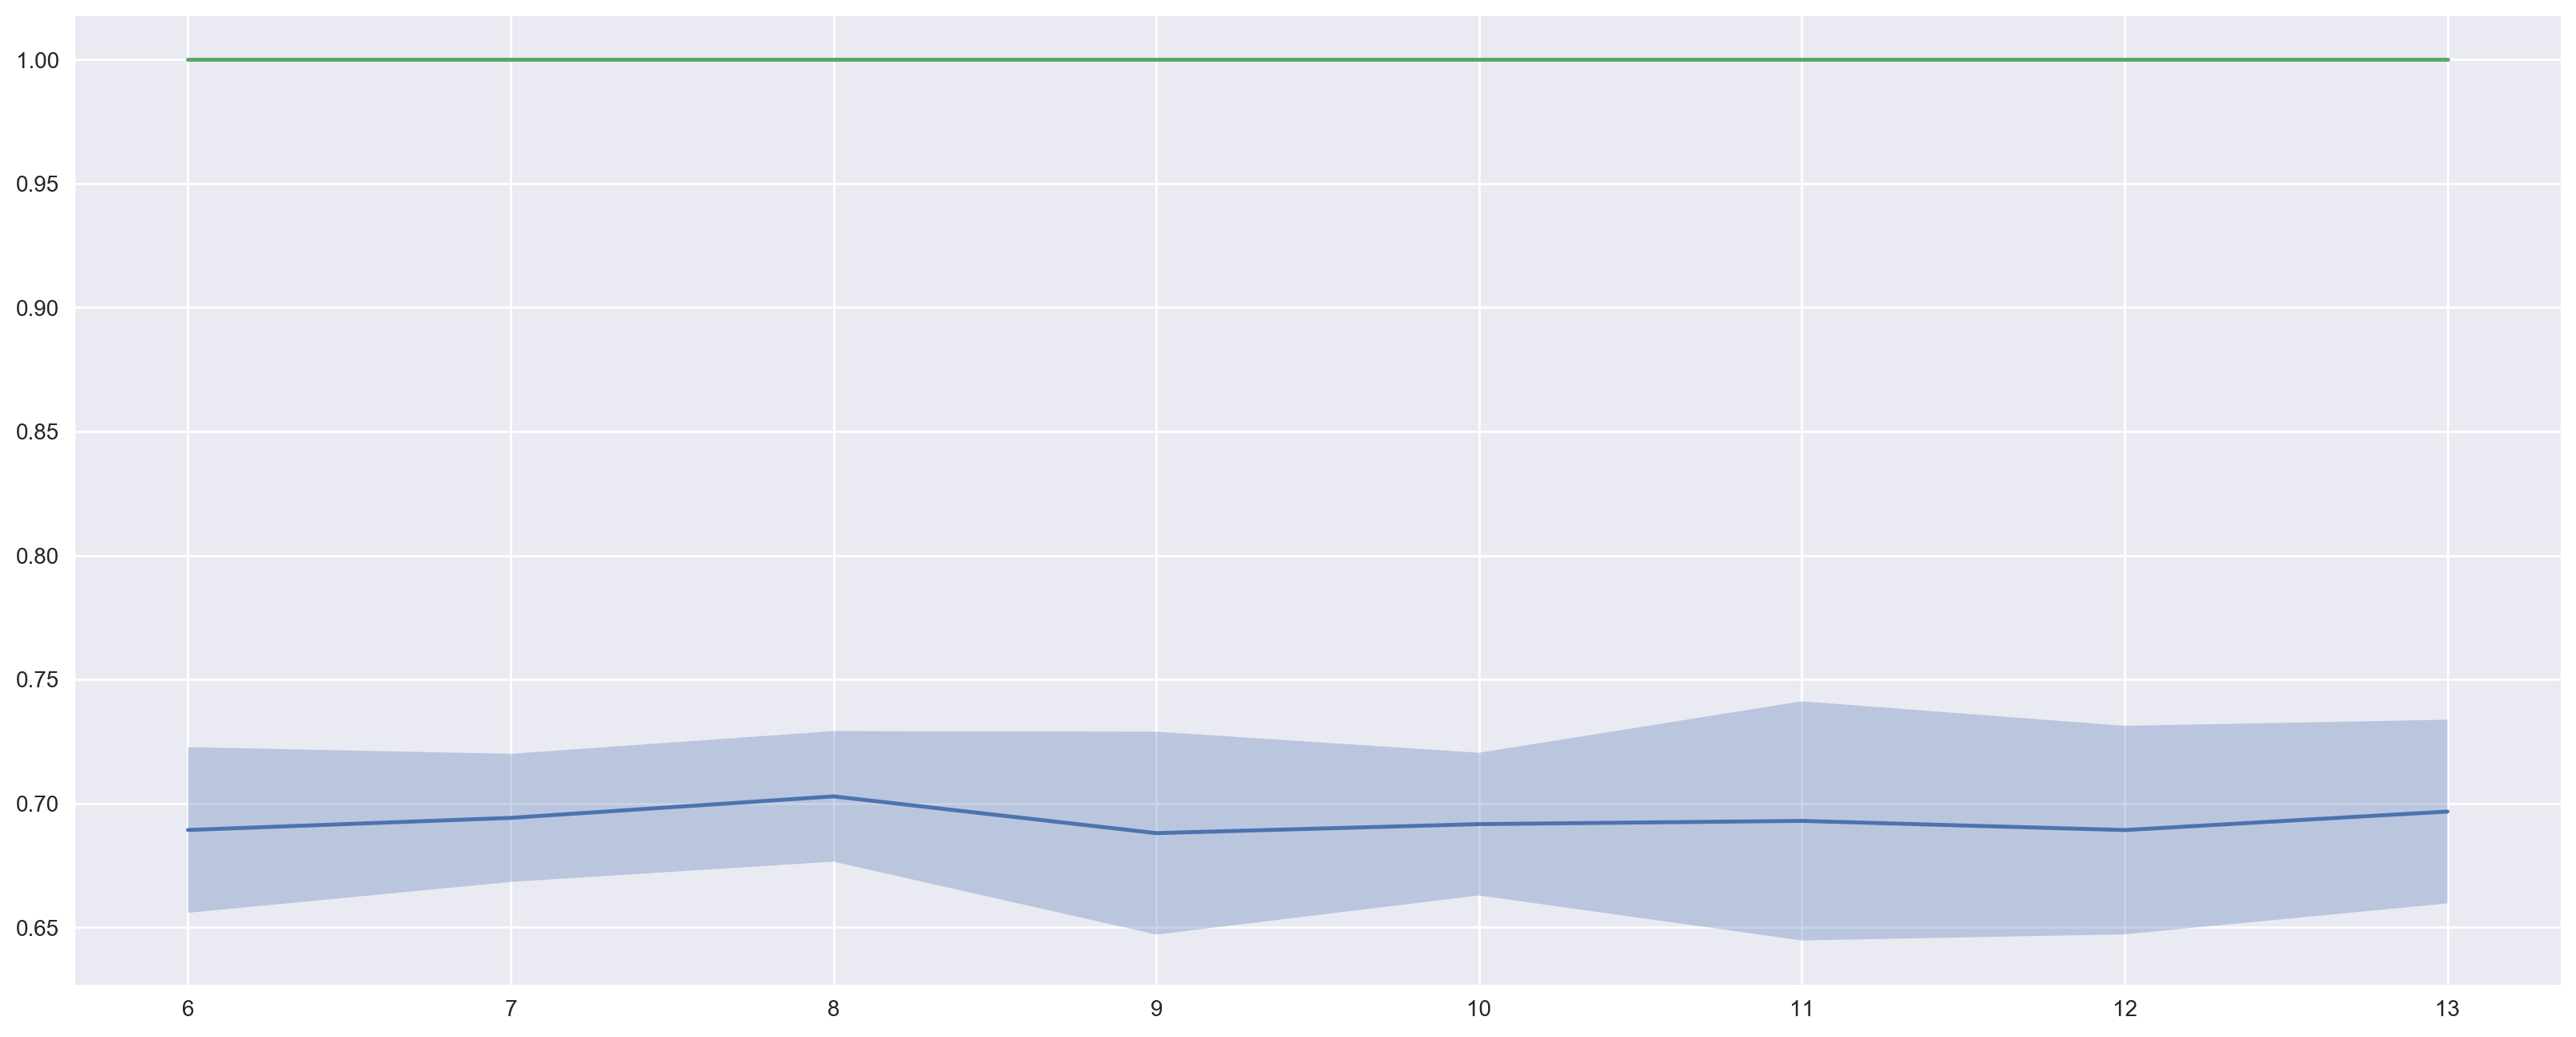

In [55]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

# XGBoost
Another known powerful algorithm that could be integrated in the ensemble that I described in the paragraph *Error Fixing* is XGBoost. I decided that it would be a boosting algorithm since it uses a different approach than bagging and the combination of the two could lead to something interesting.

I will start with a feature selection since Boosting does not work well with a lot of features, especially if they are correlated

In [2]:
# !pip install xgboost

## Feature selection for XGB

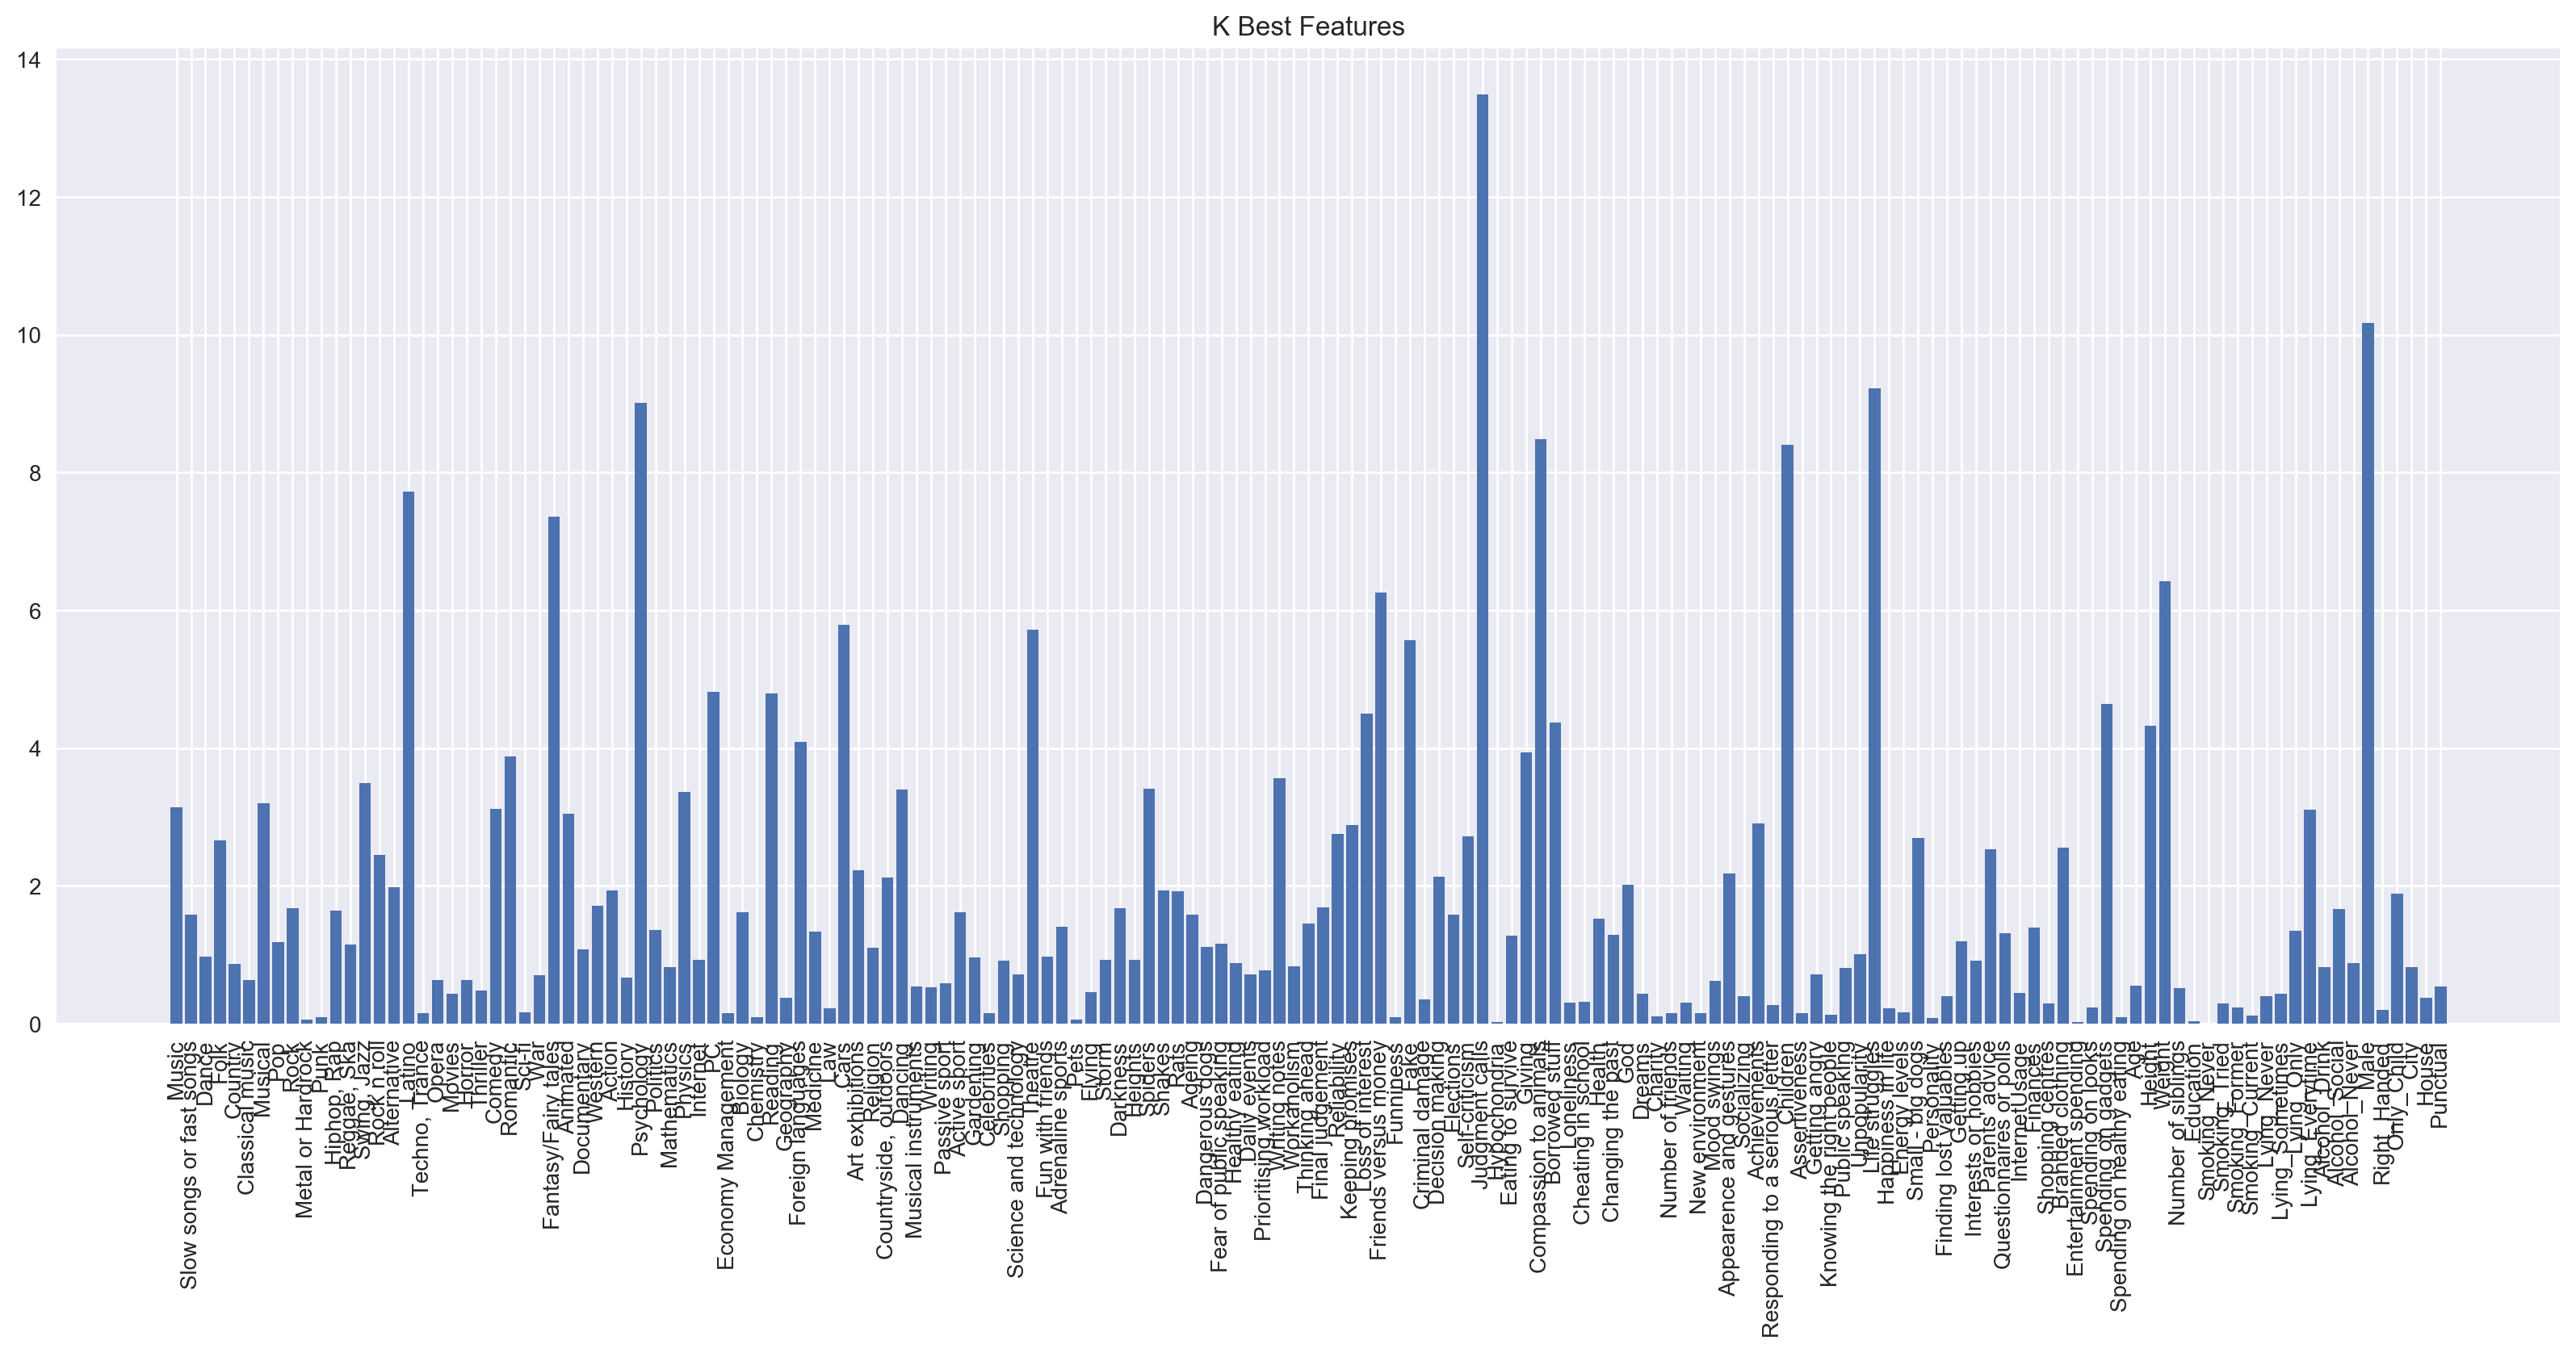

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Perform feature selection
selector = SelectKBest(f_regression, k=50)
selector.fit(df[selected_features], df['Empathy'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores for each feature 
plt.bar(range(len(selected_features)), scores)
plt.xticks(range(len(selected_features)), selected_features, rotation='vertical')
plt.title('K Best Features')
plt.show()

In [16]:
sc = list(zip(selected_features,scores))
sc.sort(key=lambda tup: tup[1])

In [17]:
print('The most important 20 features')
sc.sort(key=lambda tup: tup[1])  # sorts in place
a = sc[137:]
new_feat = [x for (x,y) in a]
new_feat.reverse()
new_feat

The most important 20 features


['Judgment calls',
 'Male',
 'Life struggles',
 'Psychology',
 'Compassion to animals',
 'Children',
 'Latino',
 'Fantasy/Fairy tales',
 'Weight',
 'Friends versus money',
 'Cars',
 'Theatre',
 'Fake',
 'PC',
 'Reading',
 'Spending on gadgets',
 'Loss of interest',
 'Borrowed stuff',
 'Height',
 'Foreign languages']

### Params tuning XGBoost
The tuning of the parameters of XGBoost is kind of complex, I will use the RandomizedSearchCV

In [70]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

from xgboost.sklearn import XGBRegressor # wrapper
# XGB with sklearn wrapper
# the same parameters as for xgboost model
params_sk = {
            "objective": "binary:hinge",
            'max_depth': 8, 
           'n_estimators': 100, # the same as num_rounds in xgboost
           'subsample': 1.0, 
           'colsample_bytree': 0.3,  
           'seed': 23}     

skrg = XGBRegressor(**params_sk)

skrg.fit(x_train[new_feat],y_train)

In [190]:
import scipy.stats as st

params_grid = {  
   'learning_rate': st.uniform(0.1, 0.8),
   'max_depth': list(range(4, 20, 2)),
    'gamma': list(range(1, 15, 1)),
   'reg_alpha': list(range(1, 15, 1))}

search_sk = RandomizedSearchCV(skrg, params_grid, cv = 5, verbose=1) 
search_sk.fit(x_train[new_feat], y_train)

# best parameters
print(search_sk.best_params_); print(search_sk.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'gamma': 1, 'learning_rate': 0.39994536194713093, 'max_depth': 18, 'reg_alpha': 12}
-0.27987660858896574


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.4s finished


I want to include a plot of the most important features for XGboost when I trained it on all the features and got a pretty bad performance (too many correlated features), just to make a comparison with the most important features selected by Random Forest

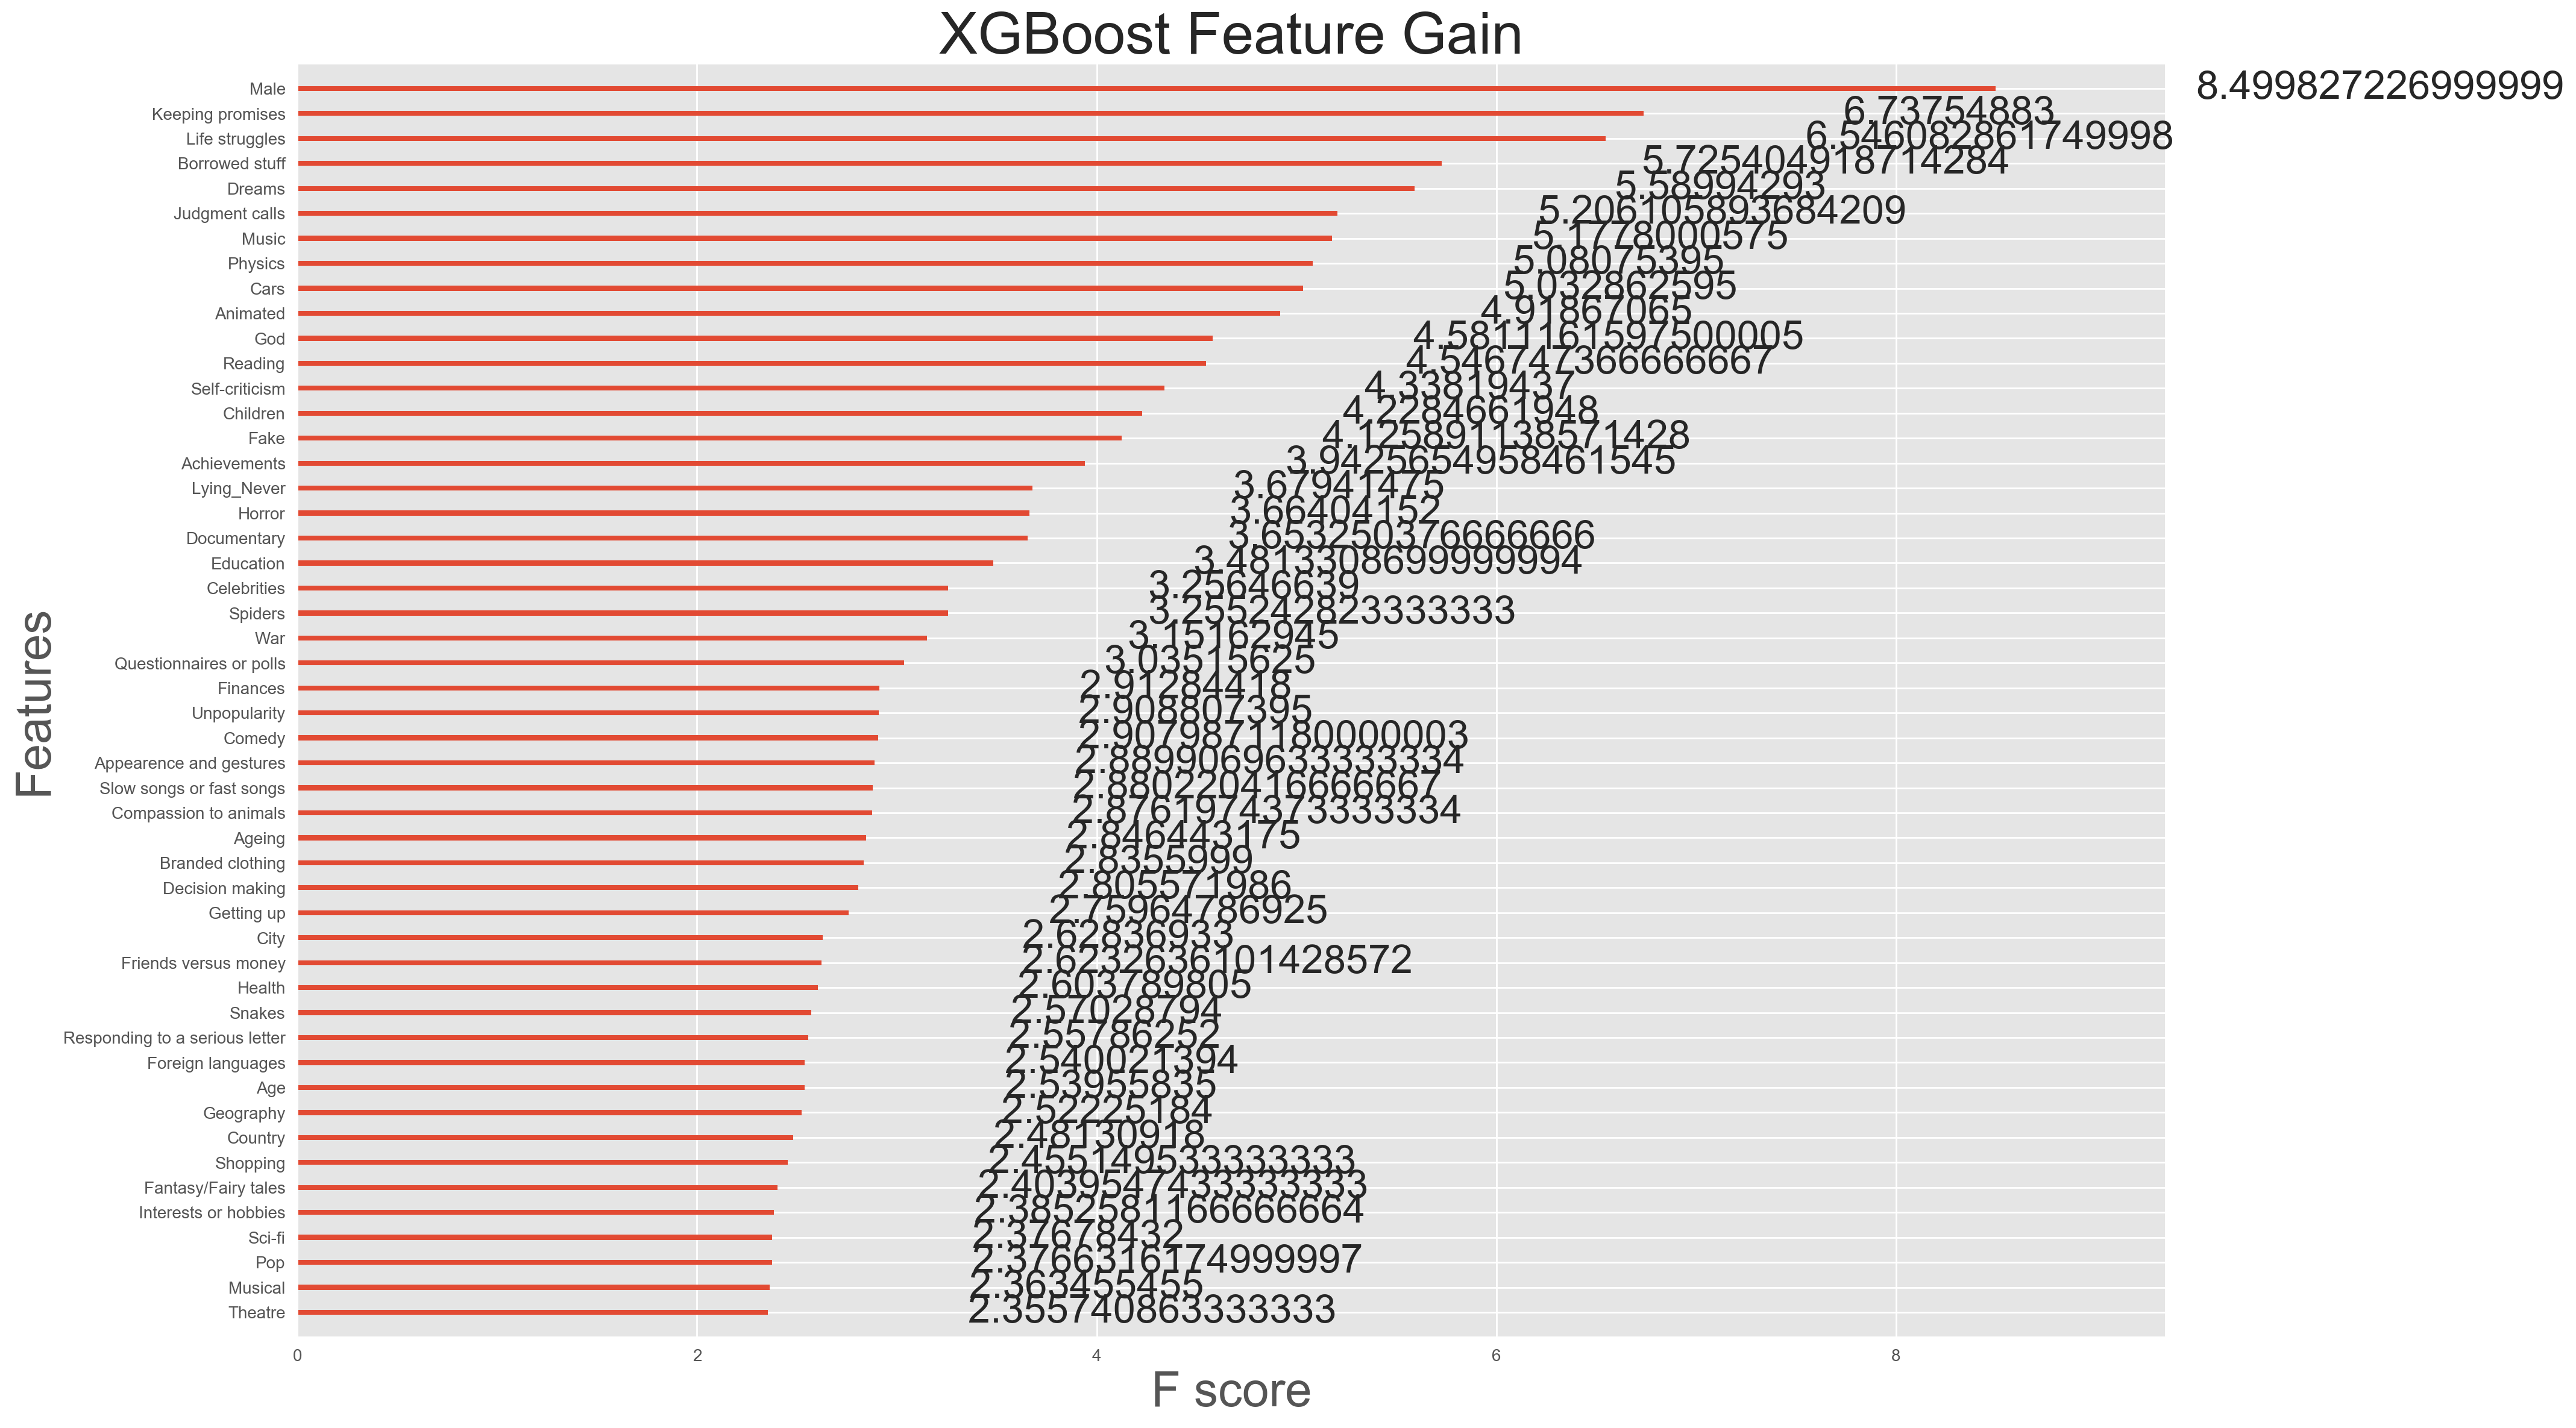

In [1143]:
# # Feature importance XGB for all features 
from xgboost import plot_importance
plot_importance(gbm, importance_type="gain", max_num_features=50)
plt.title("XGBoost Feature Gain")
plt.show()

# Final model: ensemble XGB and RF binary classifiers
This final model is built by using two binary classifier models: Random Forest and XGboost, the final prediction happens by using a custom ensemble in which if either one of them predicts 0, I will assign 0 to that (logic AND of the predictions), this choice was done because of the considerations done in the paragraphs *Error detection and correction* and *Error Fixing*

In [185]:
# test_size=0.2, random_state=66
import xgboost as xgb
x = np.array(x_train)
x_xgb = np.array(x_train[new_feat])
x_xgb_test = np.array(x_test[new_feat])
y = np.array(y_train)

# {'gamma': 1, 'learning_rate': 0.399, 'max_depth': 18, 'reg_alpha': 12}

params = {"objective": "binary:hinge",
          "eta": 0.4,  
          "max_depth": 18,
          "silent": 1,
          "nthread":-1,
          "seed": 24,
          "gamma": 1, 
          "reg_alpha": 12  
          }

num_trees = 400 #400

accuracy = []
accuracy_rf = []
accuracy_xgb = []

# x_train, x_test = x[train_index], x[test_index]
# x_xgb_train, x_xgb_test = x_xgb[train_index], x_xgb[test_index]
# y_train, y_test = y[train_index], y[test_index]
    
dtrain = xgb.DMatrix(x_xgb, y)
dvalid = xgb.DMatrix(x_xgb_test, y_test)
watchlist = [(dvalid, 'test'), (dtrain, 'train')]
gbm = xgb.train(params, dtrain, num_trees, evals=watchlist, early_stopping_rounds=50, verbose_eval=False)
#RF
RFR = RandomForestClassifier(n_estimators=60, max_depth= 14, max_features = 8, n_jobs=-1, verbose=0)
RFR.fit(x_train, y_train)
    
y_hat_rf = RFR.predict(x_test)
y_hat_xgb = gbm.predict(xgb.DMatrix(x_xgb_test))

y_hat_ensemble = y_hat_rf*y_hat_xgb

accuracy.append(mean(y_hat_ensemble == y_test))
accuracy_rf.append(mean(y_hat_rf == y_test))
accuracy_xgb.append(mean(y_hat_xgb == y_test))


print(accuracy)
print(accuracy_rf)
print(accuracy_xgb)

#0.7215098039215686

0.7810945273631841
0.7412935323383084
0.7711442786069652


## Final considerations
As we can see, the final model accuracy is 78%. I also printed the single accuracy that the single models would have without their ensemble, and it's 74% for RF and 77% for XGB.

The final ensemble result is better than the 2 single models, and better than the first Random Forest model that I tried. Boosting definitely brought improvements, and it was only working on 20 features out of the 157 processed initial ones. This demonstrates that almost all of the features are actually useless to predict Empathy.

Also, my conclusion is that this dataset was not made to predict the Empathy. It is a difficult task to predict Empathy since the accuracy is not that great given a 66% baseline, and the initial task of finding people that are very empathetic is not easily achievable in this way. Too many false positives are found given this dataset.

The reason why this happens is also probably because the dataset comes from a survey, people wrote how they think they are empathetic from 1 to 5 and this is not necessary true, it's just what they think of themselves or what they want to believe. So really, what we are predicting here is how much people think they are empathetic, given some facts (age, children, gender..) and some other tastes.